## Part B  Predictive Modelling

https://medium.com/analytics-vidhya/implementing-linear-regression-using-sklearn-76264a3c073c

https://www.kaggle.com/srivignesh/data-preprocessing-for-house-price-prediction

In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

DATA_DIR = 'data/'
OUTPUT_DIR = 'data/'

# Load data
file_name = 'zomato_df_final_data.csv'
df = pd.read_csv(DATA_DIR + file_name) 

# Subselect the main cols for analyze
df_1 = df[['cost', 'cuisine', 'rating_number', 'subzone', 'type', 'votes', 'groupon','rating_text']]


### 1. Feature Engineering 

Relationship with numerical variables

Relationship with categorical features

Correlation matrix (heatmap style)

In [4]:
#clean data

#find missing data
def find_missing_percent(data):
    """
    Returns dataframe containing the total missing values and percentage of total
    missing values of a column.
    """
    miss_df = pd.DataFrame({'ColumnName':[],'TotalMissingVals':[],'PercentMissing':[]})
    for col in data.columns:
        sum_miss_val = data[col].isnull().sum()
        percent_miss_val = round((sum_miss_val/data.shape[0])*100,2)
        miss_df = miss_df.append(dict(zip(miss_df.columns,[col,sum_miss_val,percent_miss_val])),ignore_index=True)
    return miss_df

miss_df = find_missing_percent(df_1)

# Displays columns with missing values
display(miss_df[miss_df['PercentMissing']>0.0])
print("\n")
print(f"Number of columns with missing values:{str(miss_df[miss_df['PercentMissing']>0.0].shape[0])}")


,ColumnName,TotalMissingVals,PercentMissing
0,cost,346.0,3.30
2,rating_number,3316.0,31.58
4,type,48.0,0.46
5,votes,3316.0,31.58
7,rating_text,3316.0,31.58




Number of columns with missing values:5


In [5]:
#remove NA
df_2 = df_1.dropna() 
df_2.describe()

,cost,rating_number,votes
count,7061.000000,7061.000000,7061.000000
mean,55.340037,3.287311,84.540575
std,29.247408,0.454621,176.324404
min,10.000000,1.800000,4.000000
25%,35.000000,3.000000,12.000000
50%,50.000000,3.300000,33.000000
75%,70.000000,3.600000,88.000000
max,500.000000,4.900000,3236.000000


In [121]:

# a function to explore each of the categorical variables
def explore_categorical(df, var):
    # check if the variable has any missing values
    print('********** missing values **********')
    print(df[var].isnull().sum())
    print('********** Labels **********')
    # check unique lables in variable
    print(df[var].unique())
    print('********** frequency **********')
    # check frequency of each variable
    print(df[var].value_counts())
    
explore_categorical(df_2, 'groupon')
# explore_categorical(data_ready, 'cuisine')
# explore_categorical(data_ready, 'subzone')
# explore_categorical(data_ready, 'type')

********** missing values **********
0
********** Labels **********
[False  True]
********** frequency **********
False    6960
True      101
Name: groupon, dtype: int64


In [6]:
# one-hot-encoding using dummy

# Adding dummy categories into the dataframe
df_3 = pd.concat([df_2, pd.get_dummies(df_2['groupon']).astype(int)], axis = 1)

# Drop original string based column to avoid conflict in linear regression
df_3.drop('groupon', axis = 1, inplace=True)

#change the meaningful name for groupon
data_ready = df_3.rename(columns= {False: 'no_groupon', True: 'groupon'})

### 2.1 Regression: Linear Regression

In [190]:
# Segregate the numeric and categoric data
numeric_cols = data_ready.select_dtypes(['float','int']).columns
data_numeric = data_ready[numeric_cols]


# get training and testing data
from sklearn.model_selection import train_test_split

X_numeric = data_numeric.drop(columns=['rating_number'])
y = data_ready[['rating_number']]

X_train_numeric, X_test_numeric, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2)


Numeric columns : Index(['cost', 'rating_number', 'votes', 'no_groupon', 'groupon'], dtype='object')
Categoric columns : Index(['cuisine', 'subzone', 'type'], dtype='object')
Boolean columns : Index([], dtype='object')
      cost  votes  no_groupon  groupon
3715  20.0   16.0           1        0
6180  90.0   15.0           1        0
347   62.0  201.0           1        0


In [137]:
from sklearn.linear_model import LinearRegression

model_regression_1 = LinearRegression().fit(X_train_numeric, y_train)

#obtain the MSE of model_1
from sklearn.metrics import mean_squared_error
y_pred = model_regression_1.predict(X_test_numeric)

MSE_linear_1 = mean_squared_error(y_test, y_pred)

MSE_linear_1

0.1393057078618882

Smaller MSE  is better.

### 2.2 Regression: Linear Regression with the gradient descent algorithm

In [420]:
# Building linear model with the gradient descent algorithm
#  calculates and outputs the hypothesis value of the Target Variable
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
#     print('X.shape[0] = ',X.shape[0])
#     print('theta = ',theta)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
#         print('h',i, h[i])
    h = h.reshape(X.shape[0])
    
    return h

# performs the Batch Gradient Descent Algorithm
def BGD(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * np.sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * np.sum((h-y) * X.transpose()[j])
#             print('np.sum e = ', (alpha/X.shape[0]) * np.sum((h-y) * X.transpose()[j]))
#             print('e = ', (alpha/X.shape[0]) * sum((h-y) * X.transpose()[j]))
            
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * np.sum(np.square(h - y))
 
    theta = theta.reshape(1,n+1)
    return theta, cost

# outputs the final optimized theta
def linear_regression_BGD(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, cost

#convert to numpy for processing
X_train_numeric_np = X_train_numeric.to_numpy()
y_train_np = y_train.to_numpy()

# Implementation of feature scaling
mean = np.ones(X_train_numeric_np.shape[1])
std = np.ones(X_train_numeric_np.shape[1])

for i in range(0, X_train_numeric_np.shape[1]):
    mean[i] = np.mean(X_train_numeric_np.transpose()[i])
    std[i] = np.std(X_train_numeric_np.transpose()[i])
    for j in range(0, X_train_numeric_np.shape[0]):
        X_train_numeric_np[j][i] = (X_train_numeric_np[j][i] - mean[i])/std[i]  
        
# calling the principal function with learning_rate = 0.01 and num_iters = 100
theta, cost = linear_regression_BGD(X_train_numeric_np, y_train_np, 0.00001, 500)
print('theta =', theta)
print('cost =', cost)

theta = [[ 3.45609065e-01 -8.44612584e-19  1.54278527e-18  8.96604409e-19
  -8.96604409e-19]]
cost = [938.97298985 906.01043496 876.66618003 850.54304426 827.28744534
 806.58461374 788.15433217 771.74714278 757.14097073 744.13811832
 732.56258915 722.25770592 713.08398983 704.91727264 697.64701607
 691.17481564 685.41306871 680.2837888  675.71754999 671.65254726
 668.03375992 664.8122069  661.94428379 659.39117262 657.11831649
 655.0949518  653.29369187 651.69015626 650.26264077 648.99182367
 647.86050418 646.85336963 645.95678826 645.15862463 644.44807543
 643.81552322 643.25240628 642.75110268 642.30482719 641.90753936
 641.55386182 641.23900747 640.95871468 640.70918964 640.48705496
 640.28930401 640.11326018 639.95654068 639.81702429 639.69282261
 639.58225455 639.48382355 639.39619732 639.31818982 639.2487452
 639.18692352 639.13188801 639.08289375 639.03927759 639.00044917
 638.96588295 638.93511106 638.90771701 638.88333    638.86161995
 638.84229301 638.8250876  638.80977082 63

In [423]:
# Getting the predictions
# X_test = np.concatenate((np.ones((X_test_numeric.shape[0],1)), X_test_numeric),axis = 1)
predictions = hypothesis(theta, X_test, X_test.shape[1] - 1)

#obtain the MSE of model_2
MSE_linear_2 = mean_squared_error(y_test, predictions)
print(MSE_linear_2)

[0.34560907 0.34560907 0.34560907 ... 0.34560907 0.34560907 0.34560907]
0.2291473234292452


### 3. Classification

In [8]:
#Data processing
mapping = {'Good': 1, 'Very Good': 1, 'Excellent': 1,'Poor': 0,'Average':0}
df_4 = df_3.replace({'rating_text': mapping})
numeric_cols = df_4.select_dtypes(['float','int']).columns
df_4 = df_4[numeric_cols]

X = df_4.drop(columns=['rating_text'])
y = df_4[['rating_text']]

# get training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) # this means training size if 80%

In [9]:
# Making predictions using scikit learn
from sklearn.linear_model import LogisticRegression

# Create an instance and fit the model 
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Making predictions
y_pred = lr_model.predict(X_test)

# Accuracy
print(f"Accuracy = {lr_model.score(X_test, y_test)}")

Accuracy = 0.9985845718329794


c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Confusion matrix : 
 [[502   0]
 [  2 909]]
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       502
           0       1.00      1.00      1.00       911

    accuracy                           1.00      1413
   macro avg       1.00      1.00      1.00      1413
weighted avg       1.00      1.00      1.00      1413



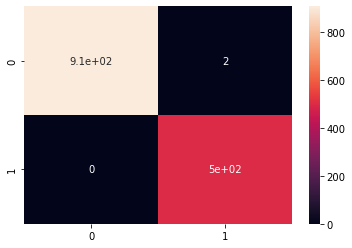

In [12]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# confusion matrix (heatmap style)
matrix = confusion_matrix(y_test,y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)


### 3.2 Conclusion and observation
The rows of the matrix represent the real classes, while the columns represent the predicted classes.

Total predictions: 1413

Correct predictions: 1411 (502 benign (TN) and 909 malignant (TP))

Incorrect predictions: 2 (2 benign classified as malignant (FP) and no malignant classified as benign (FN))

The accuracy is 99.85% which means it is a good model, although we should consider the strong correlation between rating_number and rating_text.